# Chapter 10. Data-driven customer segmentation

## 10.1 Customer segmentation

By segmenting the customer base, marketers can focus on one segment of customers at a time. It also helps marketers to tailor their marketing messages to one specific audience at a time. Customer segmentation is the backbone of successful targeted marketing, with which you can target specific groups of customers with different pricing options, promotions, and product placements that capture the interests of the target audience in the most cost-effective way

## 10.2 Clustering algorithms

This is a method of unsupervised learning that learns the commonalities between groups from data. Unlike supervised learning, where there is a target and a labeled variable that you would like to predict, unsupervised learning learns from data without any target or labeled variable

## 10.3 Segmenting customers with python

In [2]:
import pandas as pd

df = pd.read_excel('/Users/boyuan/Desktop/OneDrive/Hands on data science for martketing/Online Retail.xlsx', sheet_name = 'Online Retail')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data cleanup

In [5]:
# Dropping canceled orders 
df = df.loc[df['Quantity'] > 0]

# Dropping records with no customer id
df = df[pd.notnull(df['CustomerID'])]

# Exclusing an incomplete month 
df = df.loc[df['InvoiceDate'] < '2011-12-01']

# Computing total sales from the quantity and unit price columns 
df['Sales'] = df['Quantity'] * df['UnitPrice']

# Per-customer data 
customer_df = df.groupby('CustomerID').agg({
    'Sales': sum,
    'InvoiceNo': lambda x: x.nunique()
})
customer_df.columns = ['TotalSales', 'OrderCount']
customer_df['AvgOrderValue'] = customer_df['TotalSales']/customer_df['OrderCount']

customer_df.head(10)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,77183.60,1,77183.600000
12347.0,4085.18,6,680.863333
12348.0,1797.24,4,449.310000
12349.0,1757.55,1,1757.550000
12350.0,334.40,1,334.400000
12352.0,2506.04,8,313.255000
12353.0,89.00,1,89.000000
12354.0,1079.40,1,1079.400000
12355.0,459.40,1,459.400000


In [6]:
rank_df = customer_df.rank(method='first')
rank_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,4290.0,1.0,4298.0
12347.0,3958.0,3470.0,3888.0
12348.0,3350.0,2861.0,3303.0
12349.0,3321.0,2.0,4238.0
12350.0,1241.0,3.0,2561.0
12352.0,3630.0,3774.0,2360.0
12353.0,119.0,4.0,201.0
12354.0,2781.0,5.0,4151.0
12355.0,1670.0,6.0,3354.0


In [7]:
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head(15)

,TotalSales,OrderCount,AvgOrderValue
CustomerID,,,
12346.0,1.724999,-1.731446,1.731446
12347.0,1.457445,1.064173,1.401033
12348.0,0.967466,0.573388,0.929590
12349.0,0.944096,-1.730641,1.683093
12350.0,-0.732148,-1.729835,0.331622
12352.0,1.193114,1.309162,0.169639
12353.0,-1.636352,-1.729029,-1.570269
12354.0,0.508917,-1.728223,1.612981
12355.0,-0.386422,-1.727417,0.970690


In [8]:
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4298.000000,4298.000000,4.298000e+03
mean,0.000000,0.000000,-6.612776e-18
std,1.000000,1.000000,1.000000e+00
min,-1.731446,-1.731446,-1.731446e+00
25%,-0.865723,-0.865723,-8.657232e-01
50%,0.000000,0.000000,0.000000e+00
75%,0.865723,0.865723,8.657232e-01
max,1.731446,1.731446,1.731446e+00


### k-means clustering

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])

In [10]:
kmeans.labels_

array([0, 2, 2, ..., 1, 3, 2], dtype=int32)

In [11]:
kmeans.cluster_centers_

array([[-0.13283262, -0.84742177,  0.79556258],
       [-1.23623835, -0.78656078, -1.05614353],
       [ 1.20574048,  1.00300755,  0.87406076],
       [ 0.23914371,  0.73660916, -0.64229041]])

In [12]:
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,0
12347.0,1.457445,1.064173,1.401033,2
12348.0,0.967466,0.573388,0.929590,2
12349.0,0.944096,-1.730641,1.683093,0
12350.0,-0.732148,-1.729835,0.331622,0


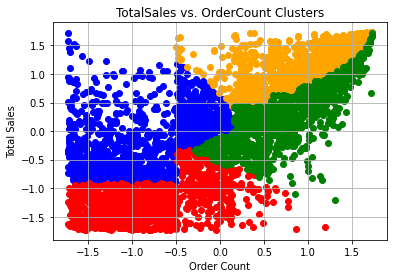

In [14]:
import matplotlib.pyplot as plt
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='blue'
)
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='red'
)
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='orange'
)
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'],
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='green'
)
plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')
plt.grid()
plt.show()

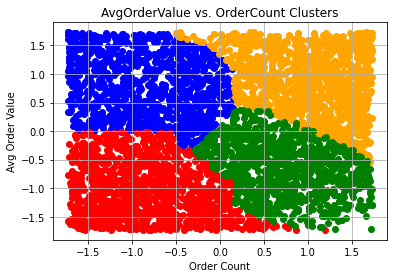

In [15]:

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

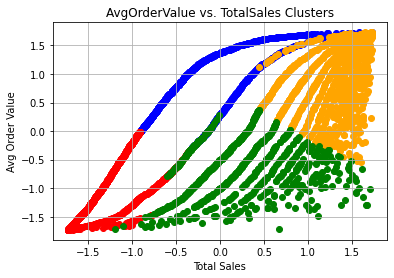

In [16]:
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='blue'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='red'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='orange'
)

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='green'
)

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

### Selecting the best number of clusters

In [19]:
from sklearn.metrics import silhouette_score 

for n_cluster in [4,5,6,7,8]:
    kmeans = KMeans(n_clusters = n_cluster).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
    silhouette_avg = silhouette_score(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
                                      kmeans.labels_)
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4117
Silhouette Score for 5 Clusters: 0.3780
Silhouette Score for 6 Clusters: 0.3772
Silhouette Score for 7 Clusters: 0.3912
Silhouette Score for 8 Clusters: 0.3812


### Interpreting customer segments

In [21]:
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_
four_cluster_df.head(10)

,TotalSales,OrderCount,AvgOrderValue,Cluster
CustomerID,,,,
12346.0,1.724999,-1.731446,1.731446,2
12347.0,1.457445,1.064173,1.401033,0
12348.0,0.967466,0.573388,0.929590,0
12349.0,0.944096,-1.730641,1.683093,2
12350.0,-0.732148,-1.729835,0.331622,2
12352.0,1.193114,1.309162,0.169639,0
12353.0,-1.636352,-1.729029,-1.570269,1
12354.0,0.508917,-1.728223,1.612981,2
12355.0,-0.386422,-1.727417,0.970690,2


In [22]:
kmeans.cluster_centers_

array([[ 1.20421383,  1.00009833,  0.8717865 ],
       [-1.24754093, -0.79740819, -1.06260727],
       [-0.13808427, -0.85279222,  0.79217774],
       [ 0.21992447,  0.71792322, -0.64305529]])

In [24]:
high_value_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 3]

pd.DataFrame(
    df.loc[
        df['CustomerID'].isin(high_value_cluster.index)
    ].groupby('Description').count()[
        'StockCode'
    ].sort_values(ascending = False).head()
)

,StockCode
Description,
WHITE HANGING HEART T-LIGHT HOLDER,613
REX CASH+CARRY JUMBO SHOPPER,437
REGENCY CAKESTAND 3 TIER,316
PARTY BUNTING,309
ASSORTED COLOUR BIRD ORNAMENT,309


## 10.4 Segmenting customers with r